<a href="https://colab.research.google.com/github/Shreyas3108/Decodr13_Apr/blob/master/CovidDataCreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
import datetime
 
def date_range(start, end):
    r = (end+datetime.timedelta(days=1)-start).days
    return [start+datetime.timedelta(days=i) for i in range(r)]
 
start = datetime.date(2020,1,22)
end = datetime.date(2020,4,27)
dateList = date_range(start, end)
datelist = []
for i in dateList :
  datelist.append(i.strftime("%m-%d-%Y")) 


# CoronaVirus Analysis : Data from John Hopkins University 

Coronavirus data collated everyday from Github. Source is given below :- 

https://github.com/CSSEGISandData/COVID-19/raw/ 

Updated till 24/4/2020 

Collating data for different dates and doing some analysis


### Importing the Dataset

In [3]:
list_data = []
for i in datelist : 
  try :
    df = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_daily_reports/{}.csv'.format(i))
    df['date'] = i
    list_data.append(df)
  except : 
    print(i)

04-27-2020


In [0]:
df = pd.concat(list_data , ignore_index= True)

### First 20 rows 

We look at the first 20 rows from our imported dataset. 

In [5]:
df.head(20)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Guangdong,Mainland China,1/22/2020 17:00,26.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Guangxi,Mainland China,1/22/2020 17:00,2.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Guizhou,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Hainan,Mainland China,1/22/2020 17:00,4.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Hebei,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Last 10 rows

In [6]:
df.tail(10)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key
117373,NaN,NaN,NaN,88.0,3.0,42.0,04-26-2020,NaN,NaN,NaN,NaN,NaN,Zambia,2020-04-27 02:30:33,-13.133897,27.849332,43.0,Zambia
117374,NaN,NaN,NaN,31.0,4.0,2.0,04-26-2020,NaN,NaN,NaN,NaN,NaN,Zimbabwe,2020-04-27 02:30:33,-19.015438,29.154857,25.0,Zimbabwe
117375,NaN,NaN,NaN,106.0,3.0,99.0,04-26-2020,NaN,NaN,NaN,NaN,Australian Capital Territory,Australia,2020-04-27 02:31:20,-35.473500,149.012400,4.0,"Australian Capital Territory, Australia"
117376,NaN,NaN,NaN,3002.0,34.0,2208.0,04-26-2020,NaN,NaN,NaN,NaN,New South Wales,Australia,2020-04-27 02:31:20,-33.868800,151.209300,760.0,"New South Wales, Australia"
117377,NaN,NaN,NaN,28.0,0.0,23.0,04-26-2020,NaN,NaN,NaN,NaN,Northern Territory,Australia,2020-04-27 02:31:20,-12.463400,130.845600,5.0,"Northern Territory, Australia"
117378,NaN,NaN,NaN,1030.0,6.0,926.0,04-26-2020,NaN,NaN,NaN,NaN,Queensland,Australia,2020-04-27 02:31:20,-27.469800,153.025100,98.0,"Queensland, Australia"
117379,NaN,NaN,NaN,438.0,4.0,411.0,04-26-2020,NaN,NaN,NaN,NaN,South Australia,Australia,2020-04-27 02:31:20,-34.928500,138.600700,23.0,"South Australia, Australia"
117380,NaN,NaN,NaN,212.0,11.0,123.0,04-26-2020,NaN,NaN,NaN,NaN,Tasmania,Australia,2020-04-27 02:31:20,-42.882100,147.327200,78.0,"Tasmania, Australia"
117381,NaN,NaN,NaN,1349.0,17.0,1265.0,04-26-2020,NaN,NaN,NaN,NaN,Victoria,Australia,2020-04-27 02:31:20,-37.813600,144.963100,67.0,"Victoria, Australia"
117382,NaN,NaN,NaN,549.0,8.0,486.0,04-26-2020,NaN,NaN,NaN,NaN,Western Australia,Australia,2020-04-27 02:31:20,-31.950500,115.860500,55.0,"Western Australia, Australia"


In [7]:
df.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'date', 'Latitude', 'Longitude', 'FIPS',
       'Admin2', 'Province_State', 'Country_Region', 'Last_Update', 'Lat',
       'Long_', 'Active', 'Combined_Key'],
      dtype='object')

In [0]:
df['Country_Region'] = np.where(df['Country_Region'].isnull() , df['Country/Region'] , df['Country_Region'])

In [0]:
df['Province_State'] = np.where(df['Province_State'].isnull() , df['Province/State'] , df['Province_State'])

In [0]:
df['Last_Update'] = np.where(df['Last_Update'].isnull() , df['Last Update'] , df['Last_Update'])

In [0]:
df['Latitude'] = np.where(df['Latitude'].isnull(),df['Lat'] , df['Latitude'])
df['Longitude'] = np.where(df['Longitude'].isnull(),df['Long_'] , df['Longitude'])

In [12]:
df.isnull().sum()

Province/State    113025
Country/Region    109766
Last Update       109766
Confirmed             19
Deaths               441
Recovered            388
date                   0
Latitude            4310
Longitude           4310
FIPS               17602
Admin2             17128
Province_State      9639
Country_Region         0
Last_Update            0
Lat                 9109
Long_               9109
Active              7617
Combined_Key        7617
dtype: int64

In [0]:
df = df.drop(['Province/State', 'Country/Region', 'Last Update','Lat','Long_'] , axis = 'columns')

In [14]:
df.head()

,Confirmed,Deaths,Recovered,date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Active,Combined_Key
0,1.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,Anhui,Mainland China,1/22/2020 17:00,NaN,NaN
1,14.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,Beijing,Mainland China,1/22/2020 17:00,NaN,NaN
2,6.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,Chongqing,Mainland China,1/22/2020 17:00,NaN,NaN
3,1.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,Fujian,Mainland China,1/22/2020 17:00,NaN,NaN
4,NaN,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN


In [0]:
df[['Confirmed','Deaths','Recovered']] = df[['Confirmed','Deaths','Recovered']].fillna(0)

In [0]:
df['Death_Per_Confirmed'] = (df['Deaths'] / (df['Confirmed']+0.000000001))*100

In [17]:
df.head()

,Confirmed,Deaths,Recovered,date,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Active,Combined_Key,Death_Per_Confirmed
0,1.0,0.0,0.0,01-22-2020,NaN,NaN,NaN,NaN,Anhui,Mainland China,1/22/2020 17:00,NaN,NaN,0.0
1,14.0,0.0,0.0,01-22-2020,NaN,NaN,NaN,NaN,Beijing,Mainland China,1/22/2020 17:00,NaN,NaN,0.0
2,6.0,0.0,0.0,01-22-2020,NaN,NaN,NaN,NaN,Chongqing,Mainland China,1/22/2020 17:00,NaN,NaN,0.0
3,1.0,0.0,0.0,01-22-2020,NaN,NaN,NaN,NaN,Fujian,Mainland China,1/22/2020 17:00,NaN,NaN,0.0
4,0.0,0.0,0.0,01-22-2020,NaN,NaN,NaN,NaN,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,0.0


In [0]:
country = df.groupby(['Country_Region','date'])[['Confirmed','Deaths','Recovered','Active','Death_Per_Confirmed']]

In [0]:
country = country.sum().reset_index()

In [0]:
first_case = country.groupby('Country_Region')['date'].min().to_frame().reset_index().rename(columns = {'date':'first_date'})

In [0]:
country = pd.merge(country , first_case , on = 'Country_Region' , how = 'left')

In [0]:
country = country.sort_values(by = ['Country_Region','date'])

In [0]:
d_conf = {}
d_death = {}
d_recv = {}
for i in list(country['Country_Region'].unique()):
  d_conf[i] = list(country[country['Country_Region'] == i]['Confirmed'].diff())
  d_death[i] = list(country[country['Country_Region'] == i]['Deaths'].diff())
  d_recv[i] = list(country[country['Country_Region'] == i]['Recovered'].diff())

In [0]:
for i in list(country['Country_Region'].unique()):
  country.loc[country['Country_Region'] == i,'conf_daily'] = d_conf[i]
  country.loc[country['Country_Region'] == i,'death_daily'] = d_death[i]
  country.loc[country['Country_Region'] == i,'recv_daily'] = d_recv[i]

In [0]:
country['days_since_first_case'] = pd.to_datetime(country['date']) - pd.to_datetime(country['first_date'])

In [0]:
india = country.query('Country_Region == "India"')

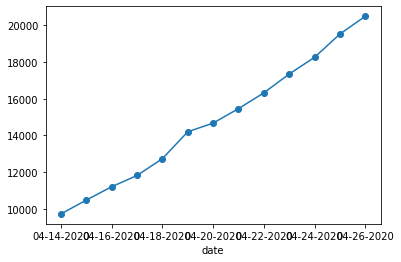

In [95]:
india.query('date > "04-14-20"').set_index('date')['Active'].plot(kind = 'line' , marker = 'o')

In [97]:
india['pct_chg']= india['conf_daily'].pct_change()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
count1 = country.groupby('Country_Region')[['Confirmed']].sum()

In [101]:
!pip install geopandas 

     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 10.4MB 15.6MB/s 
     |████████████████████████████████| 14.7MB 321kB/s 


In [102]:
!pip install folium